In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as sql
from sqlalchemy import create_engine
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [2]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [3]:
df.shape #shape of the dataset

(13580, 21)

In [4]:
df.info() #column datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#renamed the bedroom2 column to bedroom for ease of use
df.rename(columns={'Bedroom2': 'Bedroom'}, inplace=True)

In [6]:
#extracted month and year from the date column and dropped it
df['Sale_Month'] = pd.DatetimeIndex(df['Date']).month
df['Sale_Year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
#4 features are having null values
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom             0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Sale_Month          0
Sale_Year           0
dtype: int64

In [8]:
print(f"The Missing value percentage in Car Feature is:",(df.Car.isnull().sum()/df.Car.shape[0])*100)

The Missing value percentage in Car Feature is: 0.45655375552282773


In [9]:
print(f"The Missing value percentage in Building Area Feature is:", (df.BuildingArea.isnull().sum()/df.BuildingArea.shape[0])*100)

The Missing value percentage in Building Area Feature is: 47.49631811487481


In [10]:
print(f"The Missing value percentage in Year Built Feature is:", (df.YearBuilt.isnull().sum()/df.YearBuilt.shape[0])*100)

The Missing value percentage in Year Built Feature is: 39.58026509572901


In [11]:
print(f"The Missing value percentage in Council Area Feature is:", (df.CouncilArea.isnull().sum()/df.shape[0])*100)

The Missing value percentage in Council Area Feature is: 10.08100147275405


**As the missing values percentage of "Building Area" & "Year Built" is greater than 30 % of the data, we can drop or ignore those columns as they cannot be used for further analysis.**

In [12]:
df.drop(['BuildingArea', 'YearBuilt', 'Date'], axis = 1, inplace=True)

In [13]:
#filled the null values with mode
df["Car"].fillna(df.Car.mode()[0], inplace=True)

In [14]:
#replaced the null values in councilarea feature with mode values.
df["CouncilArea"].fillna(df.CouncilArea.mode()[0], inplace=True)

In [15]:
#no null values
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Sale_Month       0
Sale_Year        0
dtype: int64

In [16]:
#int values in float type
int_list = ['Price', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

In [17]:
#conversion of float values to int type
for i in int_list:
    df[i] = df[i].astype("int")

In [18]:
#df.to_csv("clean_Melb_data.csv") #for Tableau and SQL purpose

In [19]:
# host='localhost'
# user='root'
# db='Melbourne_Housing_plcmnt_pract'
# pw='password'

In [20]:
# engine=create_engine('mysql://{user}:{pw}@{host}/{db}'.format(host=host,db=db,user=user,pw=pw))
# df.to_sql('Melbourne_Housing',engine, if_exists='replace',index=False)

# EDA

In [21]:
#<21
from tabulate import tabulate
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <21) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(df)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  -------------
Suburb         Price
Address        Distance
Rooms          Postcode
Type           Landsize
Method         Lattitude
SellerG        Longtitude
Bedroom        Propertycount
Bathroom
Car
CouncilArea
Regionname
Sale_Month
Sale_Year


In [22]:
#created a function to visualize the categorical features
def cat_info(col):
    print(f'Unique values in {col} :{df[col].nunique()}')
    print(f'Missing values count for {col} : {df[col].isnull().sum()}')
    print(f'Mode of {col} : {df[col].mode()[0]}')
    print()
    
def visual(col):
    value_count=df[col].value_counts()
    value_per=df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(5,3))
    plt.bar(value_count.index,value_count.values)
    plt.xticks(rotation = 90)
    plt.title(f'Value count of {col}')
    
    plt.figure(figsize=(5,3))
    plt.pie(value_per.values,labels=value_count.index,autopct='%1.1f%%')
    plt.title(f'Percentage of {col}')
    
def main(col):   
    cat_info(col)
    visual(col)

### UNI - VARIATE

Unique values in Rooms :9
Missing values count for Rooms : 0
Mode of Rooms : 3



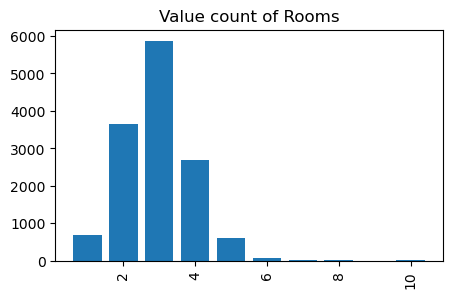

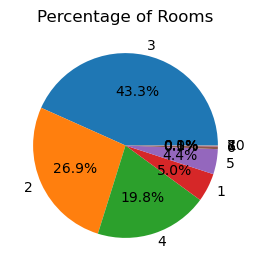

In [23]:
main('Rooms')

**Most of the Houses are having 3 rooms.**

Unique values in Type :3
Missing values count for Type : 0
Mode of Type : h



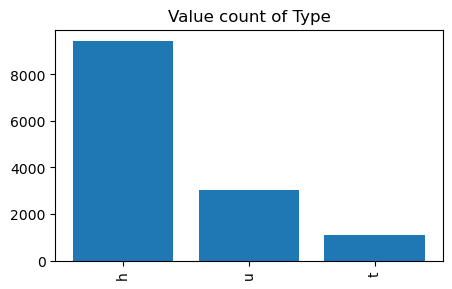

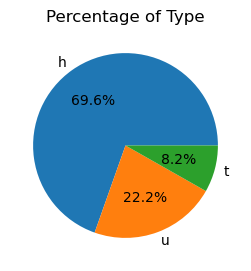

In [24]:
main('Type')

**Mostly Houses are 'H' type.**

Unique values in Method :5
Missing values count for Method : 0
Mode of Method : S



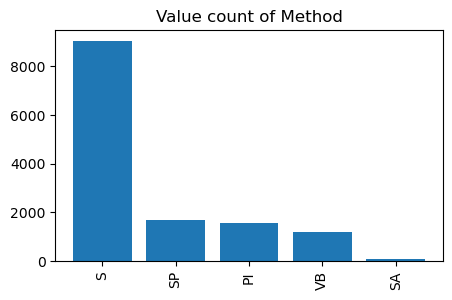

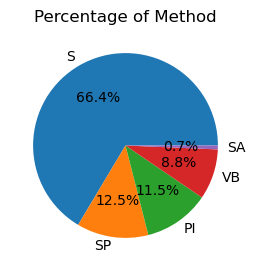

In [25]:
main('Method')

**66.4% of the properties are sold.**

In [26]:
a = df['SellerG'].value_counts()
a1 = a.head(10)
count1 = a1.values
index1 = a1.index

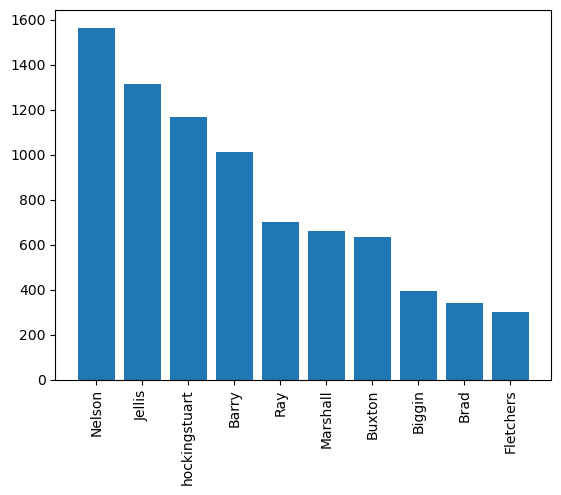

In [27]:
plt.bar(index1,count1)
plt.xticks(rotation = 90)
plt.show()

**"Nelson", "jellis" are the top 2 seller's.**

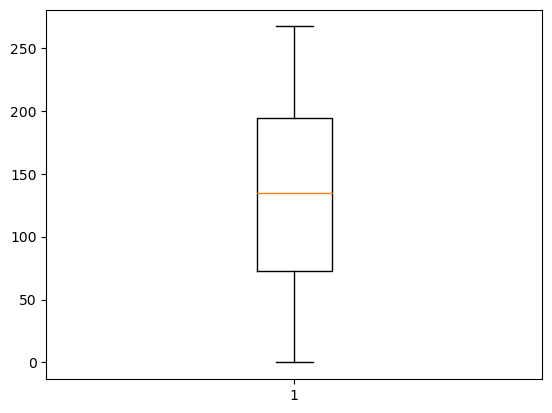

In [141]:
plt.boxplot(df['SellerG'])
plt.show()

Unique values in Bedroom :12
Missing values count for Bedroom : 0
Mode of Bedroom : 3



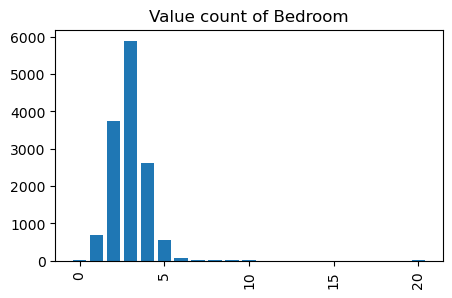

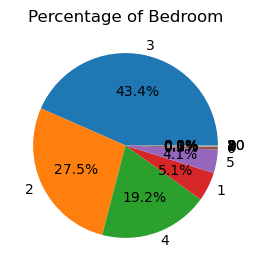

In [28]:
main('Bedroom')

**43.4% of the houses are equipped with 3 Bedrooms.**

Unique values in Bathroom :9
Missing values count for Bathroom : 0
Mode of Bathroom : 1



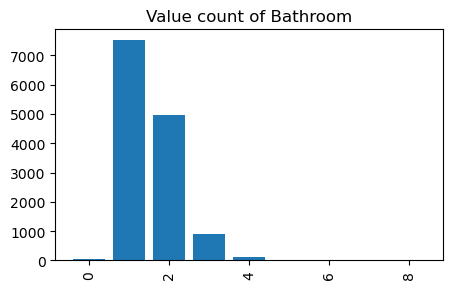

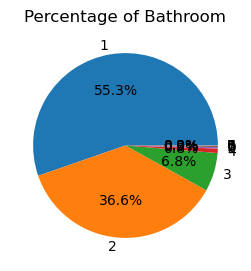

In [29]:
main('Bathroom')

**55.3% Houses are having only 1 Bathroom.**

Unique values in Car :11
Missing values count for Car : 0
Mode of Car : 2



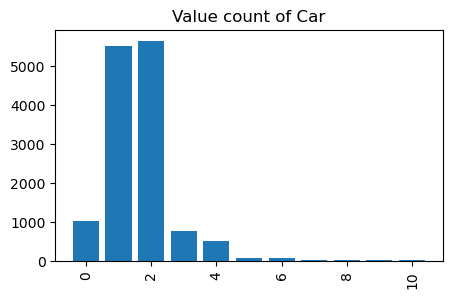

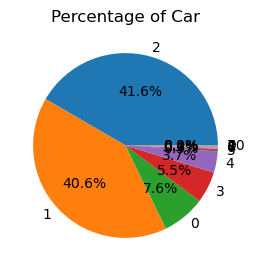

In [30]:
main('Car')

**Most of the houses are having 2 carspots.**

In [137]:
b = df['CouncilArea'].value_counts()
b1 = b.head(10)
count2 = b1.values
index2 = b1.index

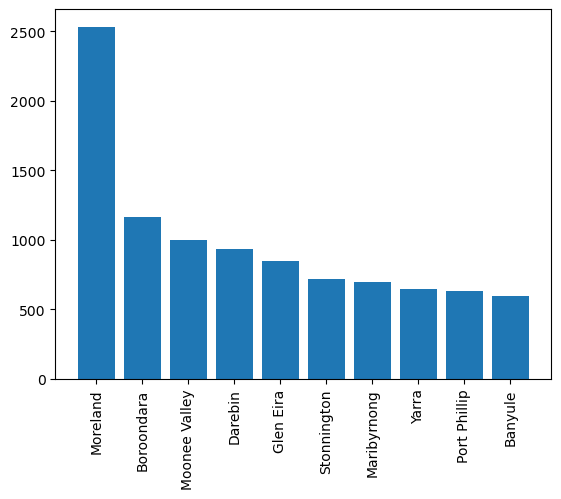

In [32]:
plt.bar(index2,count2)
plt.xticks(rotation = 90)
plt.show()

**Most houses are sold in "Moreland" followed by "Boroondara"**

Unique values in Regionname :8
Missing values count for Regionname : 0
Mode of Regionname : Southern Metropolitan



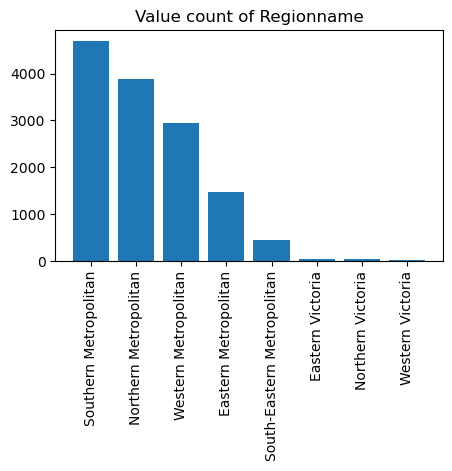

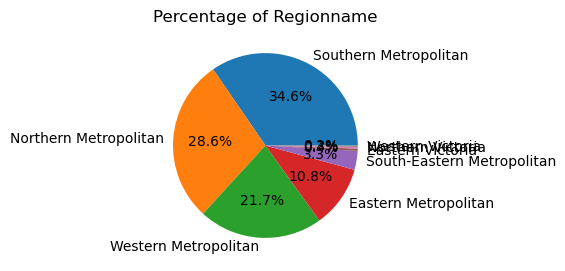

In [33]:
main('Regionname')

**34.6% of the houses are in "Southern Metrpolitan", followed by "Northern Metropolitan"**

Unique values in Sale_Month :12
Missing values count for Sale_Month : 0
Mode of Sale_Month : 8



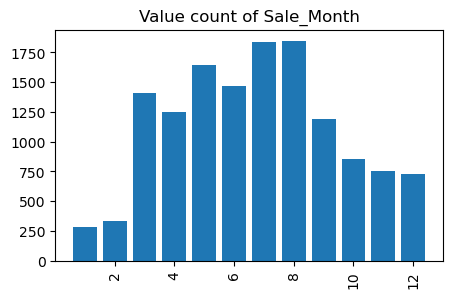

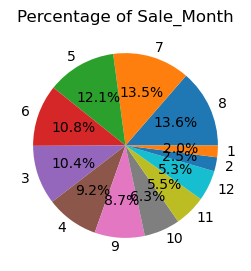

In [34]:
main('Sale_Month')

**Most of the houses are sold in 8 & 7 Month.**

In [35]:
#created a function to visualize the numerical features
def num_info(col):
    print(col)
    print(f'skewness {df[col].skew()}')
    print(f'kurtos {df[col].kurt()}')
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(6,7))
    ax[0].hist(df[col])
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('count')
    sns.boxplot(y=df[col],ax=ax[1])
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('count')
def num_vis(col):
    num_info(col)
    num_visual(col)

Price
skewness 2.239624312529873
kurtos 9.87433888590604


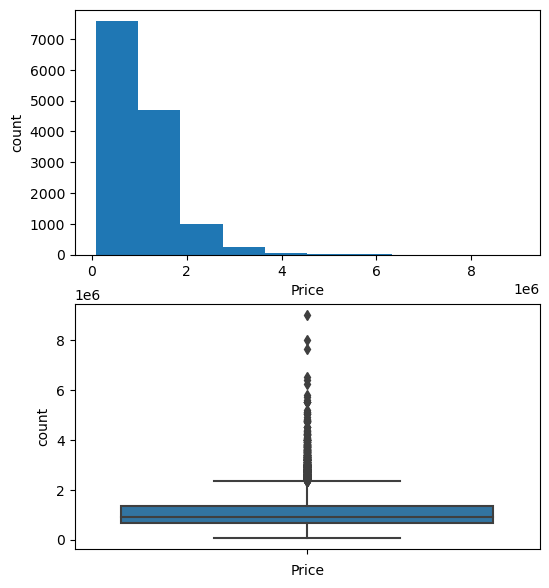

In [36]:
num_vis('Price')

Distance
skewness 1.6769370831513803
kurtos 5.260001108947867


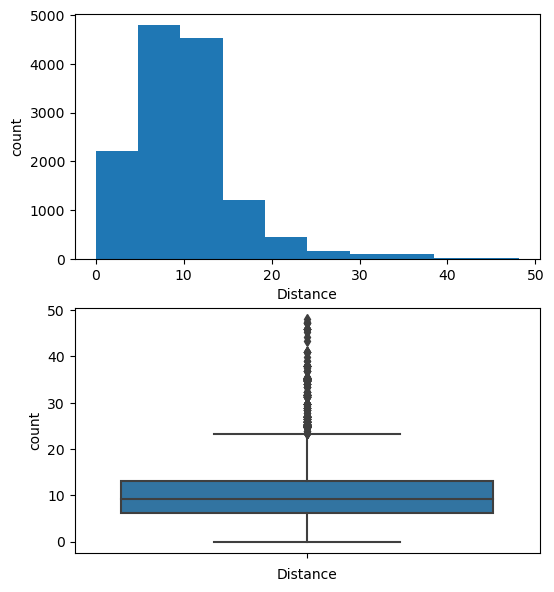

In [37]:
num_vis('Distance')

Postcode
skewness 4.076152215454636
kurtos 29.15686786523502


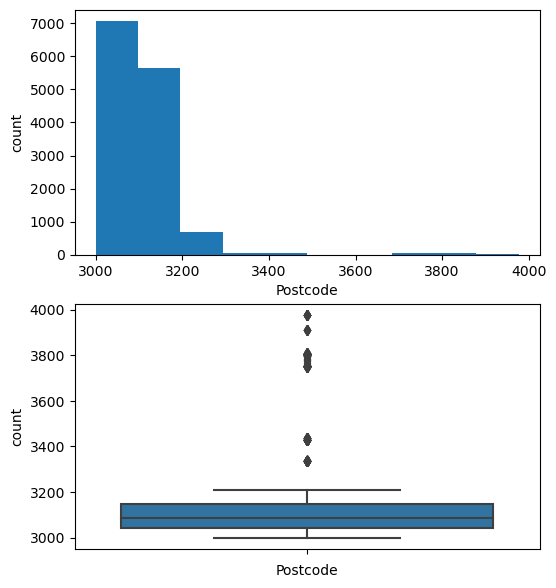

In [38]:
num_vis('Postcode')

Landsize
skewness 95.23740045101685
kurtos 10180.346827754485


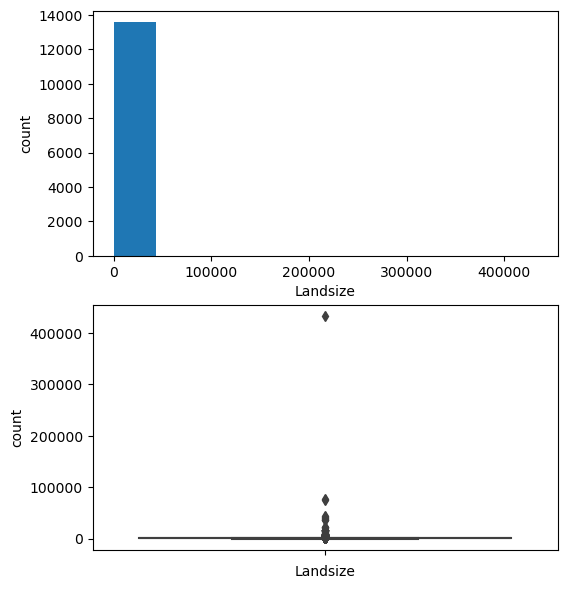

In [39]:
num_vis('Landsize')

Lattitude
skewness -0.42669493429627536
kurtos 1.573252694965038


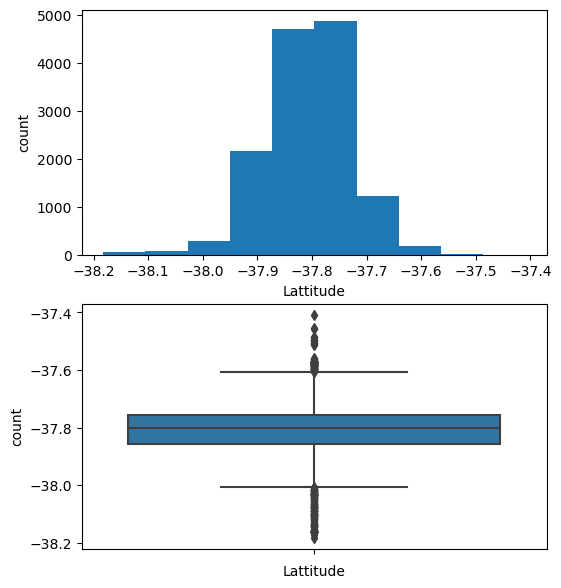

In [40]:
num_vis('Lattitude')

Longtitude
skewness -0.21099089544005414
kurtos 1.7586155851862526


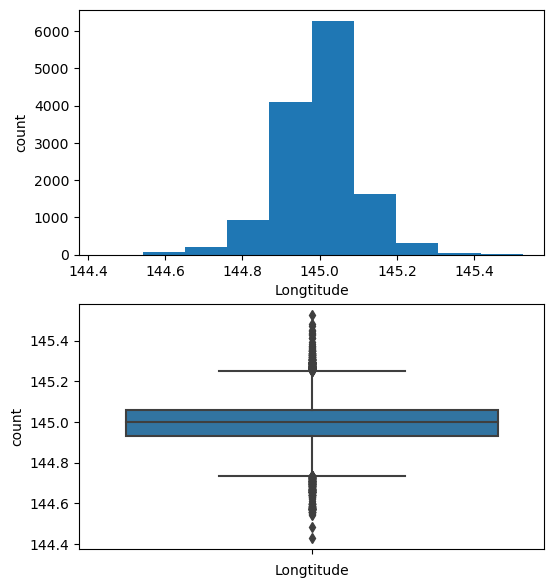

In [41]:
num_vis('Longtitude')

Propertycount
skewness 1.0693393485759513
kurtos 1.2178200113017756


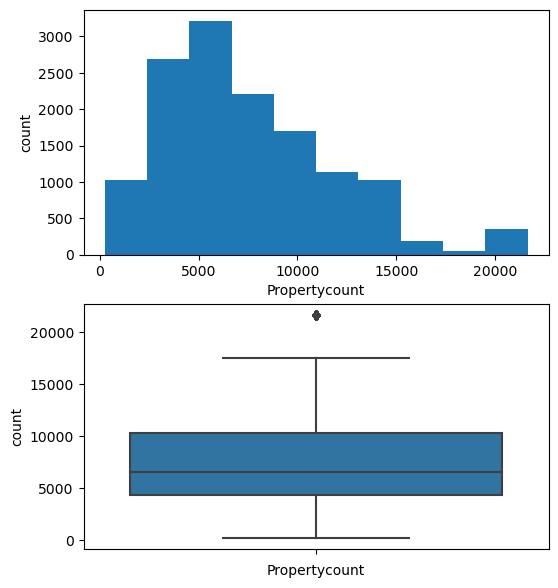

In [42]:
num_vis('Propertycount')

### BI - VARIATE ANALYSIS

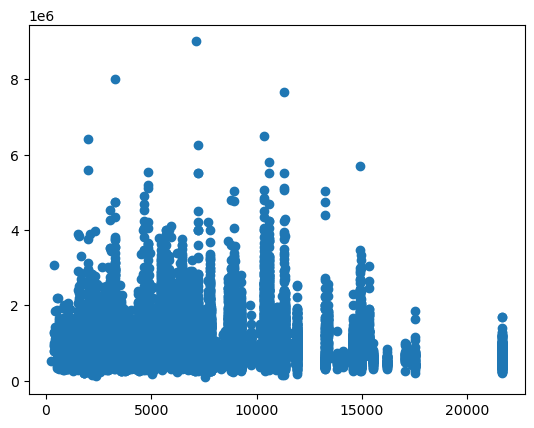

In [44]:
plt.scatter(data =df, x = "Propertycount", y = "Price")

In [45]:
cat_list = ['Rooms','Method', 'Type', 'Bedroom','Bathroom',
        'Car','Sale_Month', 'Regionname']

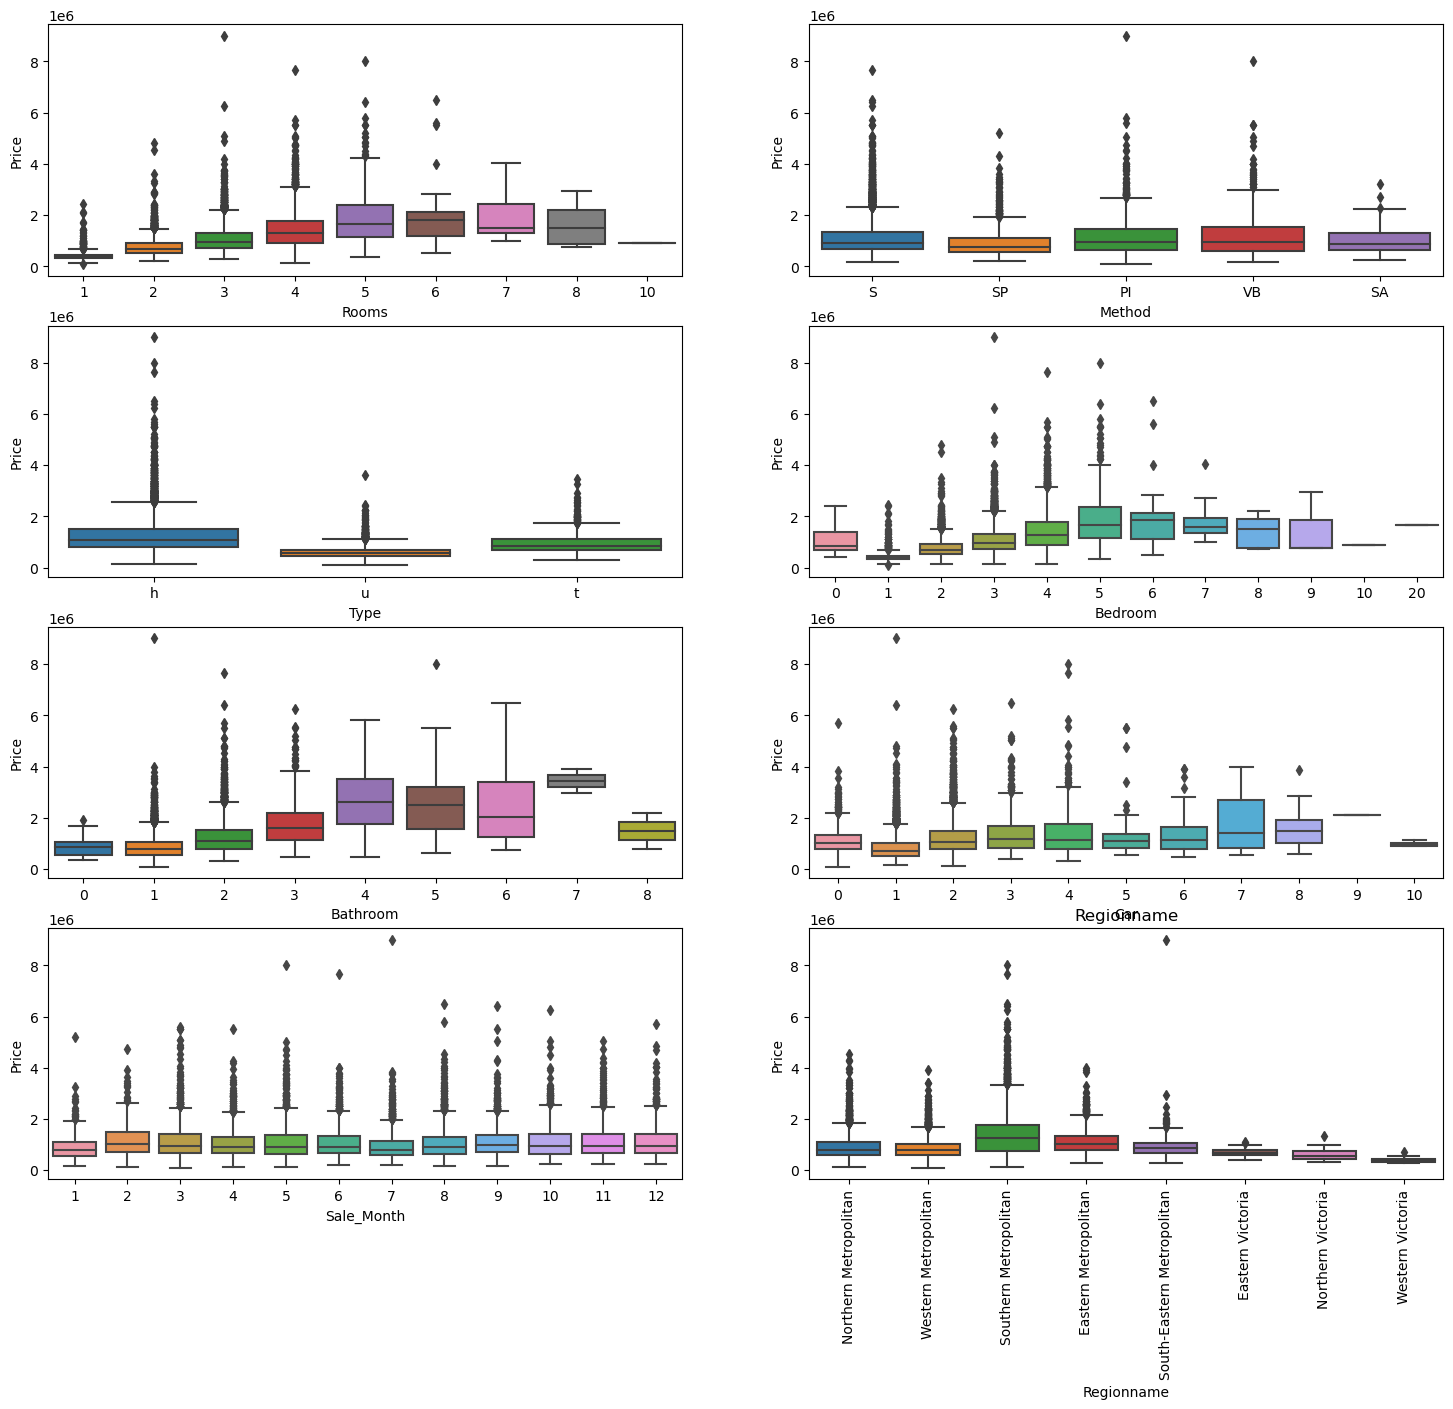

In [46]:
fig, axs = plt.subplots(4,2, figsize = (18,15))
axs = axs.ravel()
j = 0
for i in cat_list:
    sns.boxplot(x=i,y='Price',data=df, ax=axs[j])
    j+=1
    plt.title(f'{i}')
    plt.xticks(rotation = 90)
plt.show()

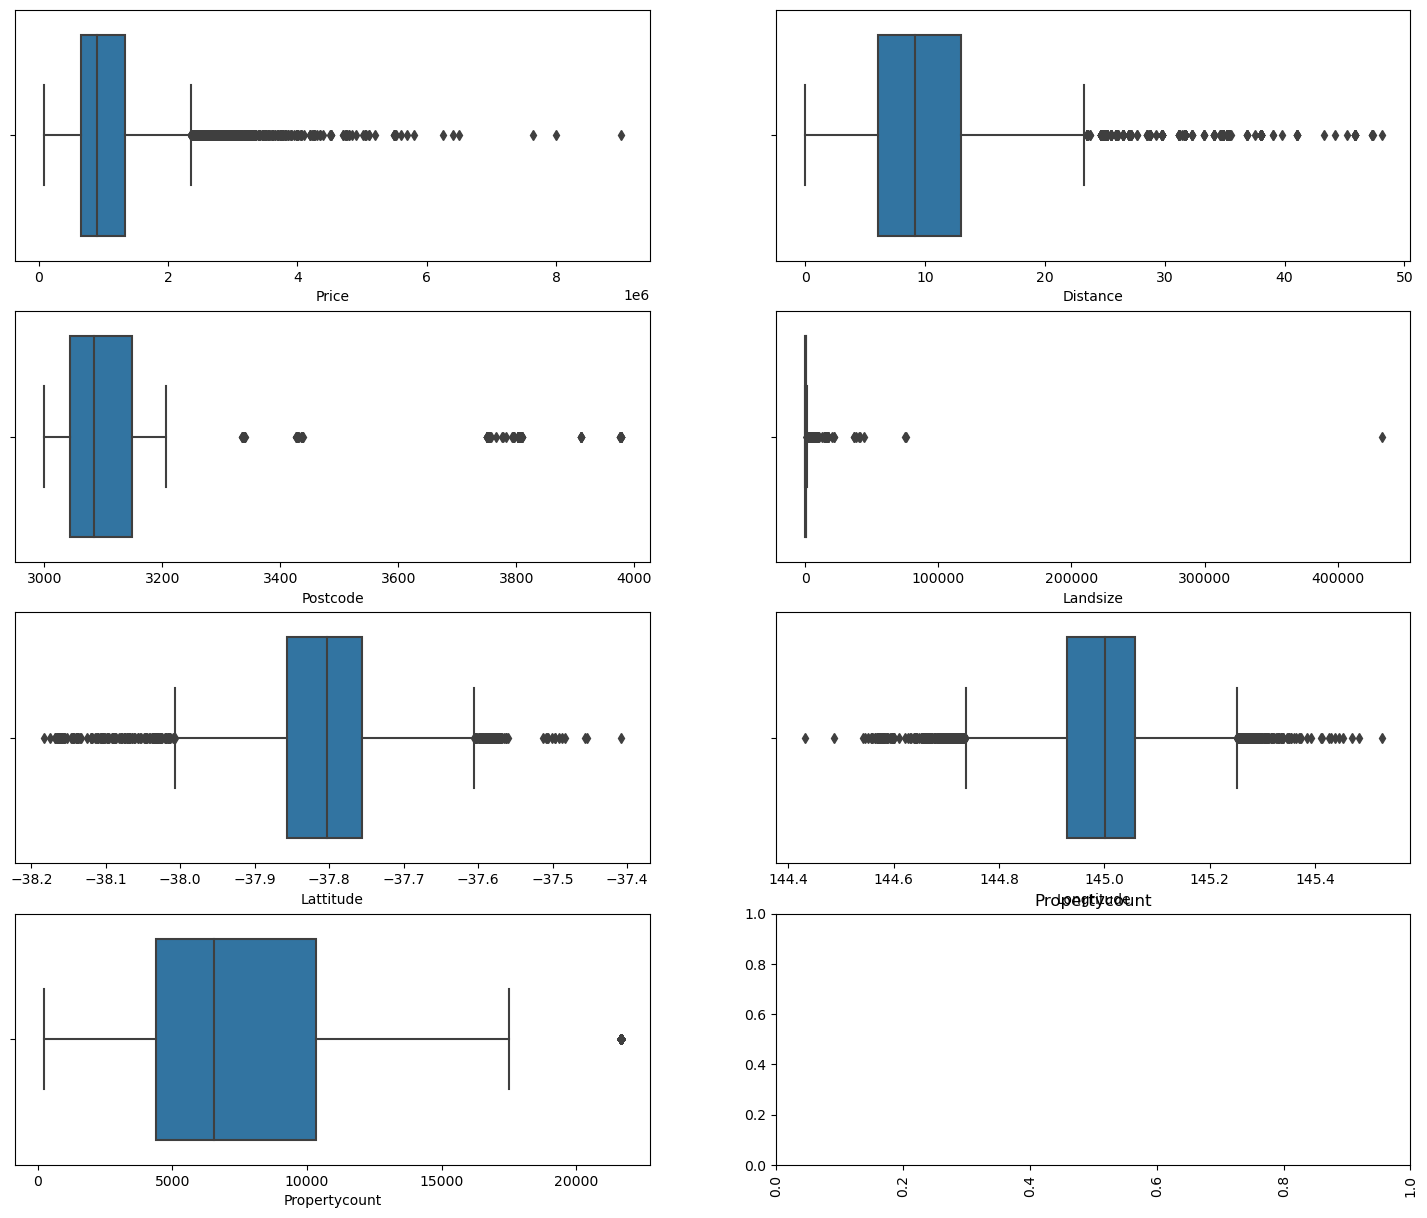

In [47]:
fig, axs = plt.subplots(4,2, figsize = (18,15))
axs = axs.ravel()
j = 0
for i in con:
    sns.boxplot(x= i, hue='Price', data =df, ax=axs[j])
    j+=1
    plt.title(f'{i}')
    plt.xticks(rotation = 90)
plt.show()

In [ ]:
#summary:

### MULTI VARIATE

**1. Number of rooms in a property and its price in Melbourne**

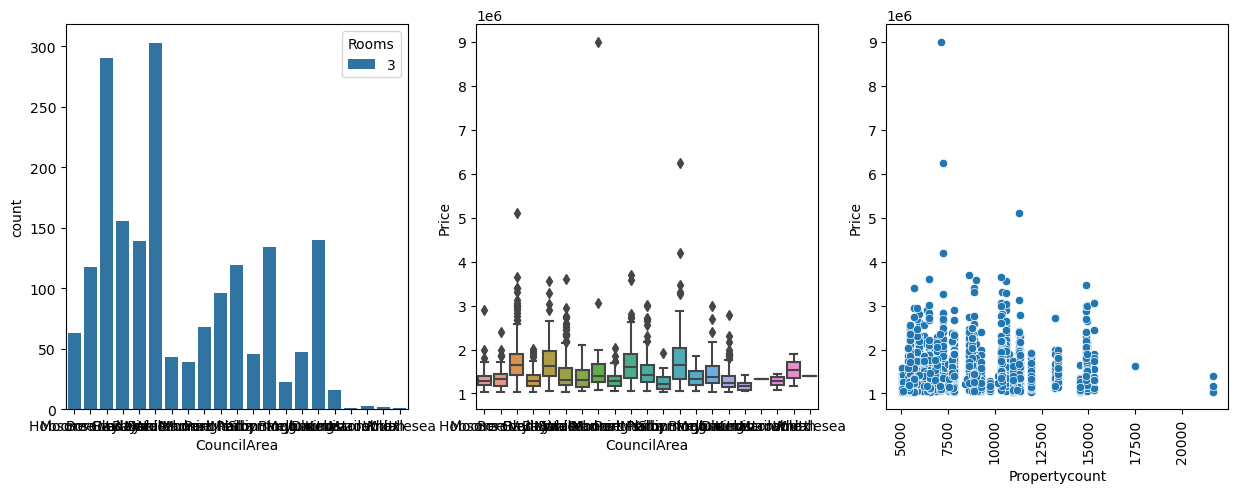

In [48]:
t1 = df[(df['Rooms'] == 3) & (df['Propertycount'] > 5000) & (df['Price']> 1035000)]
t1
fig, ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='CouncilArea',hue='Rooms',data=t1,ax=ax[0])
plt.xticks(rotation=90)
sns.boxplot(x='CouncilArea',y='Price',data=t1,ax=ax[1])
plt.xticks(rotation=90)
sns.scatterplot(data =t1, x = "Propertycount", y = "Price",ax=ax[2])
plt.xticks(rotation=90)
plt.show()

**2.Distance & number of bedrooms in a property**

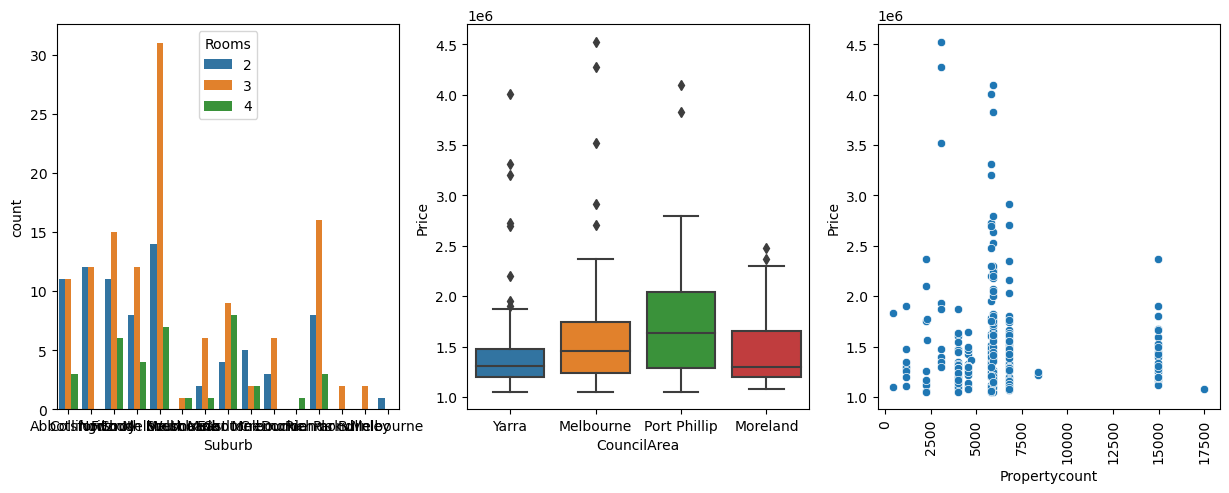

In [49]:
t2 = df[(df['Distance'] <= 2.5) & (df['Bedroom'] > 1) & (df['Price']> 1035000)]

fig, ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Suburb',hue='Rooms',data=t2,ax=ax[0])
plt.xticks(rotation=90)
sns.boxplot(x='CouncilArea',y='Price',data=t2,ax=ax[1])
plt.xticks(rotation=90)
sns.scatterplot(data =t2, x = "Propertycount", y = "Price",ax=ax[2])
plt.xticks(rotation=90)
plt.show()

**3. Top 3 Seller Sales in Council and Region Wise**

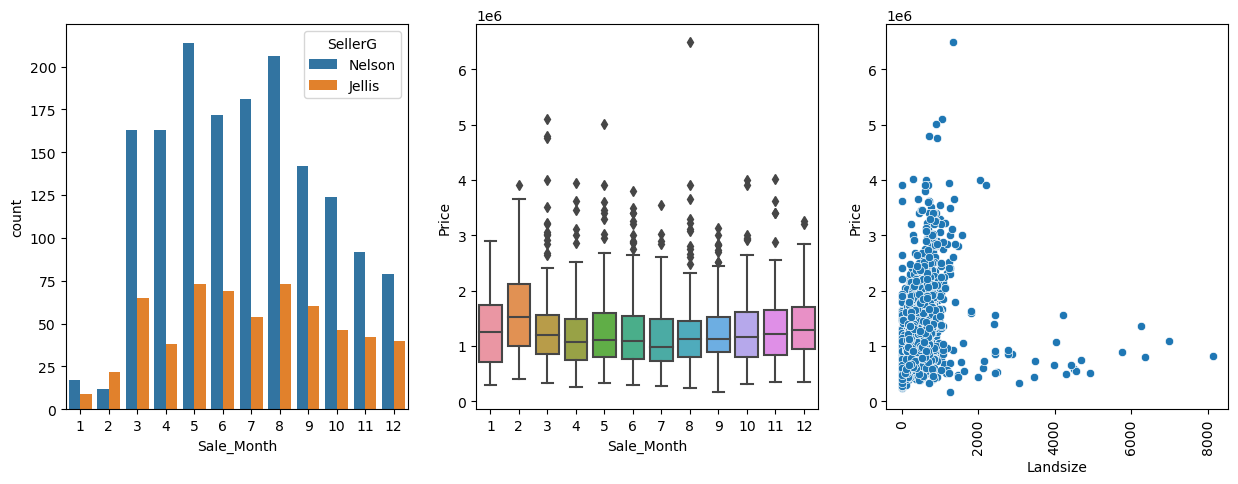

In [50]:
t3 = df[(df['SellerG'] == 'Nelson') |(df['SellerG'] == 'Jellis') & (df['Regionname'] !=  'Northern Metropolitan') & (df['Price']> 1035000)]

fig, ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Sale_Month',hue='SellerG',data=t3,ax=ax[0])
plt.xticks(rotation=90)
sns.boxplot(x='Sale_Month',y='Price',data=t3,ax=ax[1])
plt.xticks(rotation=90)
sns.scatterplot(data =t3, x = "Landsize", y = "Price",ax=ax[2])
plt.xticks(rotation=90)
plt.show()

**4.Type of house based on the Suburb and Method w.r.t Price**

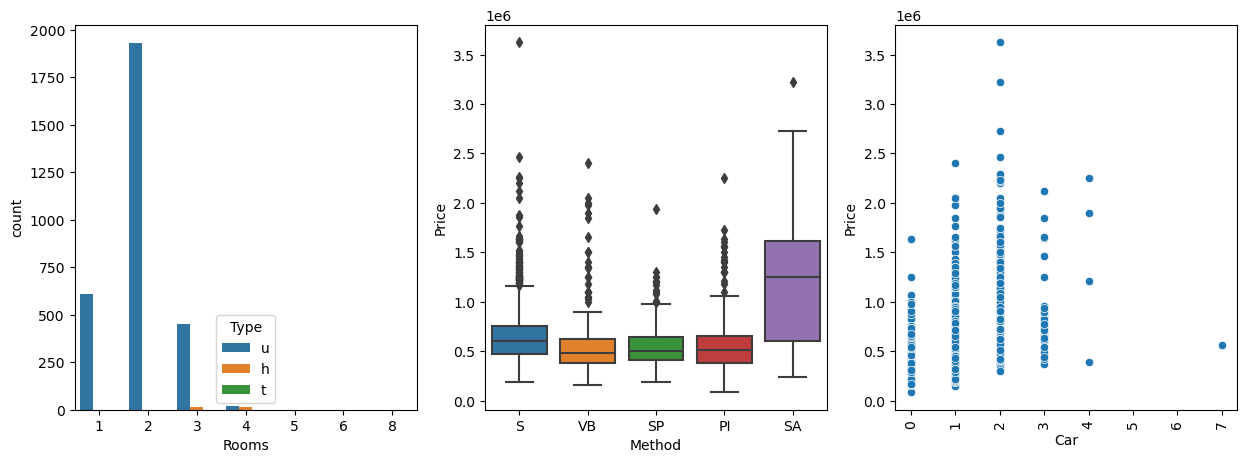

In [51]:
t4 = df[(df['Type'] == 'u') |(df['Method'] == 'SA') & (df['Regionname'] !=  'Northern Metropolitan') & (df['Price']> 1035000)]

fig, ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Rooms',hue='Type',data=t4,ax=ax[0])
plt.xticks(rotation=90)
sns.boxplot(x='Method',y='Price',data=t4,ax=ax[1])
plt.xticks(rotation=90)
sns.scatterplot(data =t4, x = "Car", y = "Price",ax=ax[2])
plt.xticks(rotation=90)
plt.show()

**Data preprocessing:**

In [58]:
#<21
from tabulate import tabulate
def dtype(df):
    cat_var = []
    con_var = []
    for col in df:
        if(df[col].dtype == 'object'):
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var
cat_var, con_var = dtype(df)
print(tabulate({'Categorical':cat_var,'Numerical':con_var},headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  -------------
Suburb         Rooms
Address        Price
Type           Distance
Method         Postcode
SellerG        Bedroom
CouncilArea    Bathroom
Regionname     Car
               Landsize
               Lattitude
               Longtitude
               Propertycount
               Sale_Month
               Sale_Year


label Encoding:

In [59]:
#Object to Categorical
for i in cat_var:
    df[i]= df[i].astype("category")

In [60]:
#Categorical to Numerical
label_encoder = preprocessing.LabelEncoder()
for i in cat_var:
    df[i] = label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int32  
 1   Address        13580 non-null  int32  
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int32  
 4   Price          13580 non-null  int32  
 5   Method         13580 non-null  int32  
 6   SellerG        13580 non-null  int32  
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  int32  
 9   Bedroom        13580 non-null  int32  
 10  Bathroom       13580 non-null  int32  
 11  Car            13580 non-null  int32  
 12  Landsize       13580 non-null  int32  
 13  CouncilArea    13580 non-null  int32  
 14  Lattitude      13580 non-null  float64
 15  Longtitude     13580 non-null  float64
 16  Regionname     13580 non-null  int32  
 17  Propertycount  13580 non-null  int32  
 18  Sale_M

Feature Scaling:

In [61]:
#feature scaling:
num_cat = ['int32', 'float64', 'int64']
num_df  = df.select_dtypes(include=num_cat)
scaler = MinMaxScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sale_Month,Sale_Year
0,0.000000,0.956418,0.111111,0.0,0.156478,0.25,0.086142,0.051975,0.068577,0.10,0.125,0.1,0.000466,0.96875,0.494755,0.517651,0.285714,0.176160,0.181818,0.0
1,0.000000,0.444270,0.111111,0.0,0.106562,0.25,0.086142,0.051975,0.068577,0.10,0.125,0.0,0.000360,0.96875,0.484031,0.513083,0.285714,0.176160,0.272727,0.0
2,0.000000,0.733647,0.222222,0.0,0.154795,0.75,0.086142,0.051975,0.068577,0.15,0.250,0.0,0.000309,0.96875,0.482223,0.513997,0.285714,0.176160,0.272727,1.0
3,0.000000,0.673096,0.222222,0.0,0.085810,0.00,0.086142,0.051975,0.068577,0.15,0.250,0.1,0.000217,0.96875,0.498243,0.516281,0.285714,0.176160,0.272727,1.0
4,0.000000,0.791583,0.333333,0.0,0.169938,1.00,0.580524,0.051975,0.068577,0.15,0.125,0.2,0.000277,0.96875,0.484936,0.513723,0.285714,0.176160,0.272727,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,0.964856,0.148838,0.333333,0.0,0.130118,0.25,0.059925,0.347193,0.153531,0.20,0.250,0.2,0.001506,0.71875,0.357781,0.672246,0.571429,0.333769,0.636364,1.0
13576,0.974441,0.914555,0.222222,0.0,0.106113,0.75,0.940075,0.141372,0.016377,0.15,0.250,0.2,0.000769,0.71875,0.417664,0.408601,0.857143,0.286482,0.636364,1.0
13577,0.974441,0.952755,0.222222,0.0,0.121705,0.25,0.726592,0.141372,0.016377,0.15,0.250,0.4,0.001007,0.71875,0.426100,0.416221,0.857143,0.286482,0.636364,1.0
13578,0.974441,0.995066,0.333333,0.0,0.270892,0.00,0.831461,0.141372,0.016377,0.20,0.125,0.5,0.002000,0.71875,0.417909,0.421346,0.857143,0.286482,0.636364,1.0


In [62]:
#correlation matrix
corel_matrix = scale_df.corr()
corel_matrix

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sale_Month,Sale_Year
Suburb,1.000000,0.027335,-0.060510,0.018195,-0.135830,0.016421,0.023240,-0.039550,-0.057947,-0.059578,-0.059516,-0.030955,0.000796,0.039707,0.137892,-0.140629,-0.010919,0.142738,0.003625,0.011599
Address,0.027335,1.000000,0.020016,-0.069483,0.049186,0.003562,-0.000806,-0.034019,0.001943,0.015854,0.005659,-0.012933,0.004874,0.013952,-0.010896,-0.004079,0.005517,0.016331,-0.005618,-0.001251
Rooms,-0.060510,0.020016,1.000000,-0.554141,0.496634,-0.051368,-0.031054,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,-0.103749,0.015948,0.100771,-0.028661,-0.081530,0.015421,0.092227
Type,0.018195,-0.069483,-0.554141,1.000000,-0.414566,0.078432,0.034045,-0.234845,0.027420,-0.533994,-0.231465,-0.273926,-0.017725,0.045088,-0.105827,0.007094,0.065048,0.082663,-0.026727,-0.082052
Price,-0.135830,0.049186,0.496634,-0.414566,1.000000,-0.037741,-0.052109,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,-0.088865,-0.212934,0.203656,0.079109,-0.042153,0.016374,0.003993
Method,0.016421,0.003562,-0.051368,0.078432,-0.037741,1.000000,-0.005728,-0.052316,-0.016321,-0.049553,-0.003509,-0.021860,0.018041,0.026343,-0.000157,-0.036409,0.016837,-0.034055,0.006448,0.011158
SellerG,0.023240,-0.000806,-0.031054,0.034045,-0.052109,-0.005728,1.000000,0.007584,0.007928,-0.030165,-0.020390,0.011688,-0.002397,0.019160,-0.032291,-0.043861,0.028686,0.060338,-0.013769,0.010547
Distance,-0.039550,-0.034019,0.294203,-0.234845,-0.162522,-0.052316,0.007584,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,-0.153893,-0.130723,0.239425,-0.096808,-0.054910,0.008831,0.249599
Postcode,-0.057947,0.001943,0.055303,0.027420,0.107867,-0.016321,0.007928,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,-0.016818,-0.406104,0.445357,-0.010656,0.062304,-0.004620,0.101151
Bedroom,-0.059578,0.015854,0.944190,-0.533994,0.475951,-0.049553,-0.030165,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,-0.095642,0.015925,0.102238,-0.034797,-0.081350,0.018985,0.113348


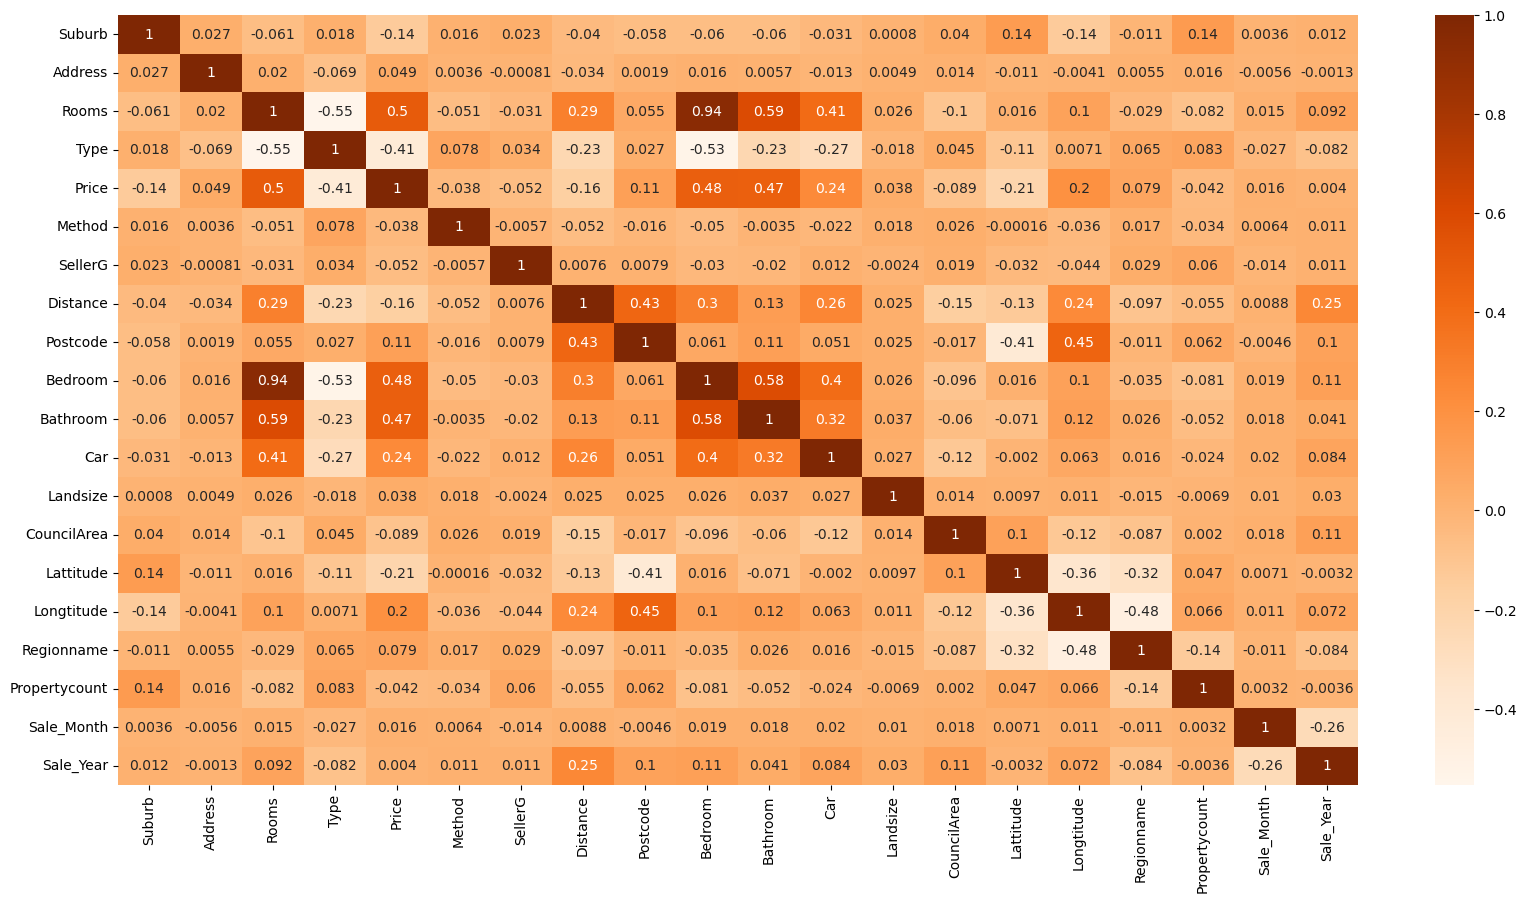

In [63]:
#heatmap for correlation visualization
plt.figure(figsize=(20,10))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [64]:
#created a function to to select un-correlated features
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [65]:
#features with set threshold value
sel_features=correlation(scale_df,0.5)
len(set(sel_features))

3

In [66]:
sel_features #  drop - 'Postcode','Lattitude','Longtitude' smsy

{'Bathroom', 'Bedroom', 'Type'}

Splitting Data:

In [67]:
#here, y is the target column
y =df['Price']
X = scale_df.drop(['Price','Postcode','Lattitude','Longtitude', 'Sale_Year','Bathroom'], axis = 1) 
print(X.shape)
print(y.shape)

(13580, 14)
(13580,)


In [68]:
#splitted the data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(y_test.shape)

(9506, 14)
(4074,)


In [69]:
#created list to append scores
r2_score_train=[]
r2_score_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]

### Linear Regression:

In [70]:
#linear regression
linear = LinearRegression()
lr_model = linear.fit(X_train, y_train)

In [71]:
#predicting the model
y_pred = lr_model.predict(X_test)

In [72]:
#metrics
r2_train = lr_model.score(X_train, y_train)
r2_score_train.append(r2_train)
intercept = lr_model.intercept_
slope= lr_model.coef_

In [73]:
#defined a function for ease of appending the values to list
def scores(a,b):
    lr_rmse = mean_squared_error(a,b, squared=False)
    rmse.append(lr_rmse)
    print("RMSE:",lr_rmse)
    lr_mse = mean_squared_error(a,b)
    mse.append(lr_mse)
    print("MSE:", lr_mse)
    lr_mae = mean_absolute_error(a,b)
    mae.append(lr_mae)
    print("MAE:", lr_mae )
    lr_mape = mean_absolute_percentage_error(a,b)
    mape.append(lr_mape)
    print("MAPE:", lr_mape)

In [74]:
#metric scores
scores(y_test, y_pred)

RMSE: 469214.9978408305
MSE: 220162714198.77057
MAE: 323799.8455522503
MAPE: 0.334695740865726


In [75]:
#test accuracy
r2_test = lr_model.score(X_test, y_test)
r2_score_test.append(r2_test)
r2_test

0.43355674730996796

In [76]:
print('R_square:', r2_train)
print('Intercept:', intercept)
print('Slope:',slope)

R_square: 0.41969567554046083
Intercept: 991193.4202011304
Slope: [ -254576.24393013    35278.72558091  2000262.85898548  -365385.51690041
   -34358.48162283   -68039.60757742 -1976383.46750601  1371747.39678371
   527386.42163346  2007846.45644654  -152655.62871974   150666.88122207
    58008.24910864    14304.57974268]


In [77]:
#train nd test scores
print("tr:",r2_train)
print("te:",r2_test)

tr: 0.41969567554046083
te: 0.43355674730996796


In [78]:
#Adjsuted  scores
adjusted_train_r2 = 1-((1-0.41)*(13580-1)/(13580-f-1))
adjusted_test_r2 = 1-((1-0.43)*(4074-1)/(4074-f-1))
print("Adjusted Train R2:",adjusted_train_r2)
print("Adjusted Test R2:", adjusted_test_r2)

Adjusted Train R2: 0.4096956970232831
Adjusted Test R2: 0.42901869158878503


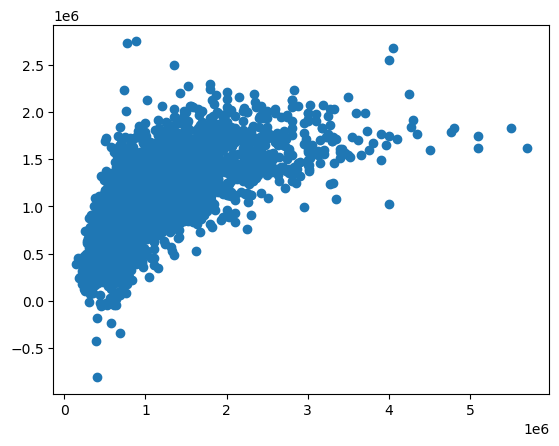

In [79]:
#Plotting the plot b/w test and the predicted score
plt.scatter(y_test,y_pred)
plt.show()

### Decision Tree Regressor

In [80]:
from sklearn import tree

In [81]:
#splitting into number of folds
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [82]:
dt = DecisionTreeRegressor()

In [83]:
#Parameters grid
param_grid1={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [84]:
grid_cv1 = GridSearchCV(dt,param_grid1,cv=kf,scoring="r2")

In [85]:
#fitting the training data
grid_cv1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='r2')

In [86]:
#best scores as per the train data
grid_cv1.best_score_

0.6874375732100969

In [87]:
#best paramets as per the train data
grid_cv1.best_params_

{'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 40}

In [88]:
#best estimated parameters as per the data
grid_cv1.best_estimator_

DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=40)

In [89]:
# fit the model again with best parameters
dt_model = DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=20)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=20)

In [90]:
#training accuracy
dt_r2train = dt_model.score(X_train,y_train)
r2_score_train.append(dt_r2train)
dt_r2train

0.8017612299473704

In [91]:
#testing accuracy
dt_r2test = dt_model.score(X_test, y_test)
r2_score_test.append(dt_r2test)
dt_r2test

0.664451873060372

In [92]:
#predicting the data based on the test data
y_pred1=dt_model.predict(X_test)

In [93]:
#scores based on prediction
scores(y_test, y_pred1)

RMSE: 361136.25558057684
MSE: 130419395094.7597
MAE: 224769.8906479655
MAPE: 0.20914104725717456


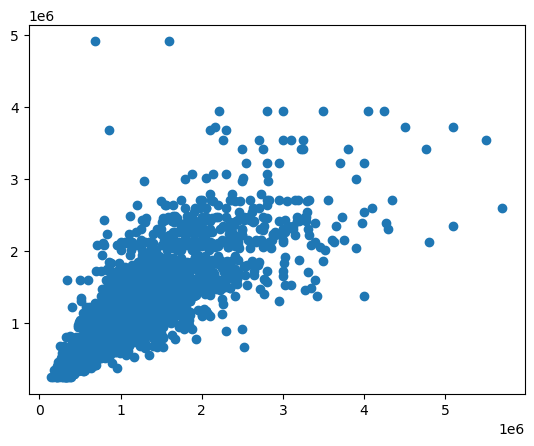

In [94]:
#plotting the graph b/w the test data and the predict data
plt.scatter(y_test,y_pred1)
plt.show()

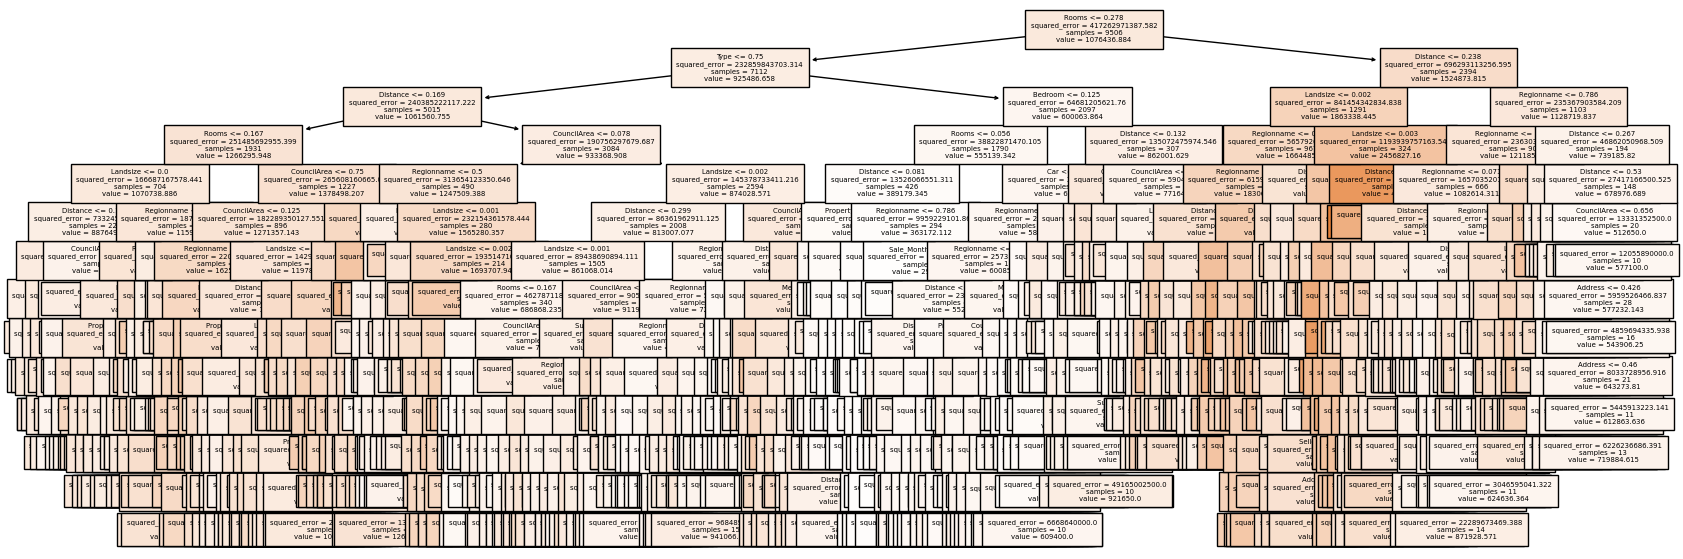

In [95]:
#tree diagram
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X.columns,filled=True,fontsize=5)
plt.show()

### Random Forest Regressor

In [96]:
param_grid2={"n_estimators":np.arange(20,101,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,51,20),
            "max_depth":np.arange(3,15)}

In [97]:
rf = RandomForestRegressor()

In [98]:
grid_cv2=GridSearchCV(rf,param_grid2,cv=kf,scoring="r2")

In [100]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='r2')

In [101]:
grid_cv2.best_score_

0.745537886554981

In [102]:
grid_cv2.best_params_

{'max_depth': 14,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 80}

In [103]:
grid_cv2.best_estimator_

RandomForestRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80)

In [104]:
rf_model = RandomForestRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=80)

In [105]:
rf_r2_train = rf_model.score(X_train,y_train)
r2_score_train.append(rf_r2_train)
rf_r2_train

0.8174841985662469

In [106]:
rf_r2_test = rf_model.score(X_test, y_test)
r2_score_test.append(rf_r2_test)
rf_r2_test

0.7355507453104244

In [107]:
y_pred2=rf_model.predict(X_test)


In [108]:
scores(y_test, y_pred2)

RMSE: 320600.98698324536
MSE: 102784992854.63106
MAE: 196223.42955292546
MAPE: 0.18300471461940443


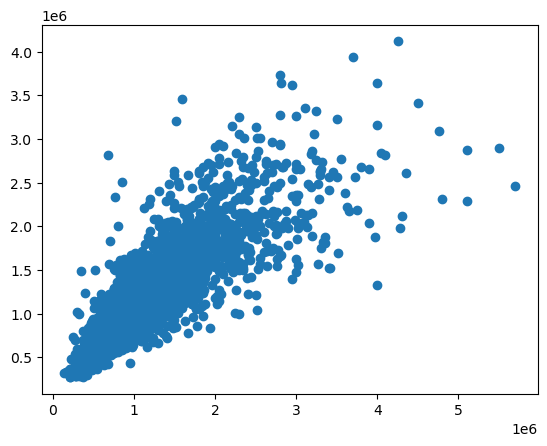

In [109]:
plt.scatter(y_test,y_pred2)
plt.show()

### KNN

In [110]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsRegressor(k),X_train,y_train,scoring="r2",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [111]:
for k in range(2,25):
    print("number of neighbors:",k,":",r2_scores[k-2])

number of neighbors: 2 : 0.41949419696251217
number of neighbors: 3 : 0.46433490593804355
number of neighbors: 4 : 0.4858527208194211
number of neighbors: 5 : 0.5002800534187368
number of neighbors: 6 : 0.5010584064259352
number of neighbors: 7 : 0.5028020490033178
number of neighbors: 8 : 0.5075811643568268
number of neighbors: 9 : 0.507602424819547
number of neighbors: 10 : 0.5070835154179184
number of neighbors: 11 : 0.5041435570825556
number of neighbors: 12 : 0.5018092359049604
number of neighbors: 13 : 0.4992475824718414
number of neighbors: 14 : 0.4984987842575929
number of neighbors: 15 : 0.4974010469078257
number of neighbors: 16 : 0.4943783799308375
number of neighbors: 17 : 0.4937115003792445
number of neighbors: 18 : 0.4920459736508141
number of neighbors: 19 : 0.48938819945326434
number of neighbors: 20 : 0.487171233926044
number of neighbors: 21 : 0.48569714627833466
number of neighbors: 22 : 0.48581027183609926
number of neighbors: 23 : 0.48416466187270524
number of neig

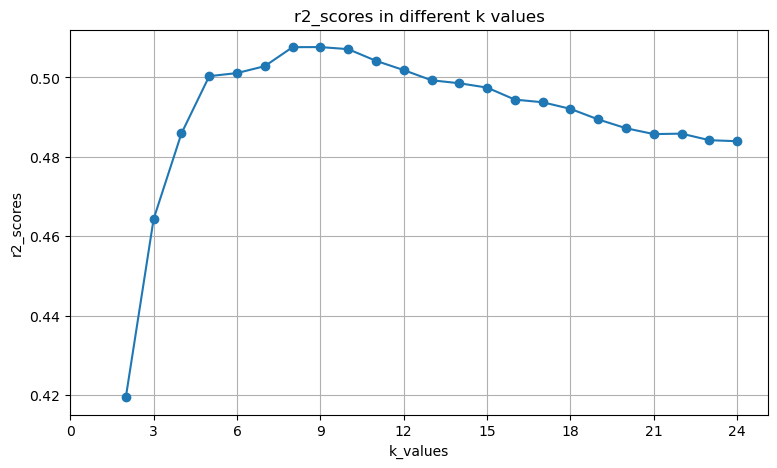

In [112]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [113]:
k= 9
kn_model = KNeighborsRegressor(k).fit(X_train, y_train)
y_pred_4 = kn_model.predict(X_test)

In [114]:
knr2_train = kn_model.score(X_train, y_train)
r2_score_train.append(knr2_train)
knr2_test = kn_model.score(X_test, y_test)
r2_score_test.append(knr2_test)

In [115]:
print("accuracy_train:",knr2_train)
print("accuracy_test:",knr2_test)

accuracy_train: 0.6134993887314388
accuracy_test: 0.5198909905468478


In [116]:
scores(y_test, y_pred_4)

RMSE: 431979.96925788926
MSE: 186606693840.04694
MAE: 284997.41297114495
MAPE: 0.28866507627165106


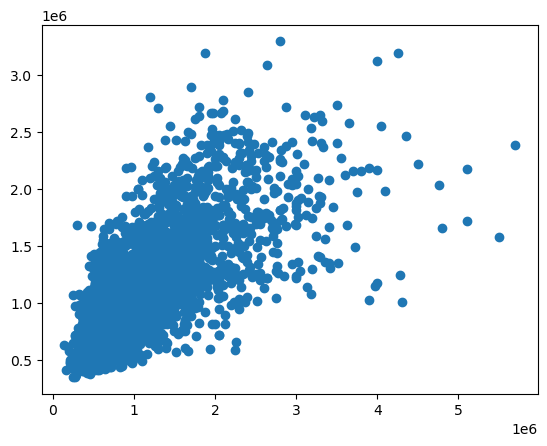

In [117]:
plt.scatter(y_test,y_pred_4)
plt.show()

### Stacking

In [118]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",kn_model))
level1.append(("svr",SVR()))
level1.append(("dt",dt_model))
level1.append(("rnd",rf_model))
level1.append(("ada", AdaBoostRegressor()))
level2=LinearRegression() 
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [119]:
level1

[('lr', LinearRegression()),
 ('knn', KNeighborsRegressor(n_neighbors=9)),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=20)),
 ('rnd',
  RandomForestRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=20,
                        n_estimators=80)),
 ('ada', AdaBoostRegressor())]

In [120]:
st_model =stack_model.fit(X_train, y_train)
y_pred_st = st_model.predict(X_test)

In [121]:
score=cross_val_score(stack_model,X_train,y_train,scoring="r2",cv=kf)
print(score)

[0.71791493 0.74268925 0.75114666 0.77402795 0.75861861]


In [122]:
print("Rscore:",np.mean(score))

Rscore: 0.7488794818259531


In [123]:
str2_train = st_model.score(X_train, y_train)
r2_score_train.append(str2_train)
str2_test = st_model.score(X_test, y_test)
r2_score_test.append(str2_test)

In [124]:
print("R-square train data:",str2_train )
print("R-square test data:",str2_test )

R-square train data: 0.8299567894008514
R-square test data: 0.7360807020562383


In [125]:
scores(y_test, y_pred_st)

RMSE: 320279.5834238581
MSE: 102579011558.16006
MAE: 196519.38618237549
MAPE: 0.1792172250732112


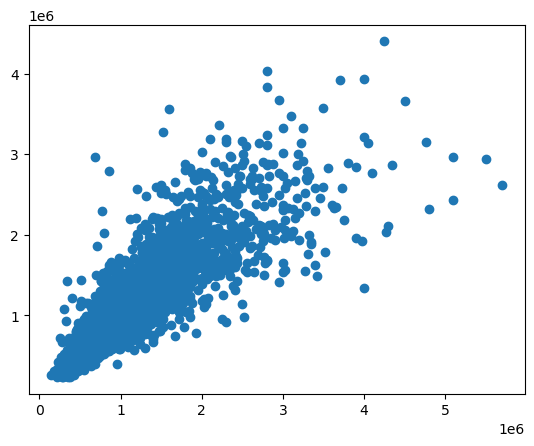

In [126]:
plt.scatter(y_test,y_pred_st)
plt.show()

# Summary:

In [127]:
model_list=["Linear Regression","Decision Tree Regression","Random Forest Regression","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Train)","r2 Score(Test)","RMSE","MSE","MAE","MAPE"]

In [128]:
r2_score_test

[0.43355674730996796,
 0.664451873060372,
 0.7355507453104244,
 0.5198909905468478,
 0.7360807020562383]

In [129]:
r2_score_train

[0.41969567554046083,
 0.8017612299473704,
 0.8174841985662469,
 0.6134993887314388,
 0.8299567894008514]

In [130]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],r2_score_train[i],r2_score_test[i],rmse[i],mse[i],mae[i],mape[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,r2 Score(Train),r2 Score(Test),RMSE,MSE,MAE,MAPE
0,Linear Regression,0.419696,0.433557,469214.997841,2.201627e+11,323799.845552,0.334696
1,Decision Tree Regression,0.801761,0.664452,361136.255581,1.304194e+11,224769.890648,0.209141
2,Random Forest Regression,0.817484,0.735551,320600.986983,1.027850e+11,196223.429553,0.183005
3,KNN Regression,0.613499,0.519891,431979.969258,1.866067e+11,284997.412971,0.288665
4,Stacked Regression,0.829957,0.736081,320279.583424,1.025790e+11,196519.386182,0.179217


In [131]:
sorted_df = final_results[['Models', 'r2 Score(Test)']]

In [132]:
sorted_df

,Models,r2 Score(Test)
0,Linear Regression,0.433557
1,Decision Tree Regression,0.664452
2,Random Forest Regression,0.735551
3,KNN Regression,0.519891
4,Stacked Regression,0.736081


In [133]:
sorted_df.sort_values('r2 Score(Test)', ascending=False, inplace=True)

In [134]:
sorted_df

,Models,r2 Score(Test)
4,Stacked Regression,0.736081
2,Random Forest Regression,0.735551
1,Decision Tree Regression,0.664452
3,KNN Regression,0.519891
0,Linear Regression,0.433557


In [135]:
rvse_list = list(sorted_df['Models'])
rvse_list

['Stacked Regression',
 'Random Forest Regression',
 'Decision Tree Regression',
 'KNN Regression',
 'Linear Regression']

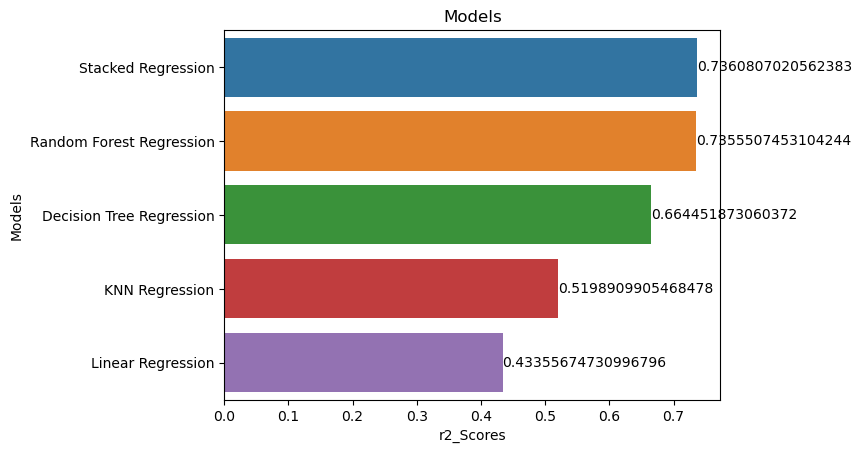

In [136]:
models = sorted_df['Models']
test_score = sorted_df['r2 Score(Test)']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
plt.xlabel('r2_Scores')
for i, v in enumerate(test_score):
    plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# Over all 'Stacked Regression Model', R2 score is 73%, closely followed by 'Random Forest Regressor model'